In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('/content/placement.csv')

In [4]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [5]:
df.shape

(100, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


**unnamed should be remove**

In [9]:
df=df.iloc[:,1:]

In [11]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [12]:
import matplotlib.pyplot as plt

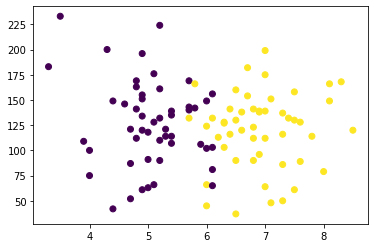

In [14]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [15]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

**Train Test split**

In [19]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [20]:
X_train

,cgpa,iq
44,7.5,61.0
73,4.9,61.0
77,7.3,50.0
41,5.4,114.0
86,5.1,128.0
...,...,...
80,4.9,196.0
91,7.5,158.0
20,6.6,120.0
40,4.9,134.0


In [21]:
y_train

44    1
73    0
77    1
41    0
86    0
     ..
80    0
91    1
20    1
40    0
5     1
Name: placement, Length: 90, dtype: int64

In [22]:
X_test

,cgpa,iq
35,6.8,90.0
65,8.1,166.0
74,6.7,154.0
11,6.9,138.0
32,7.0,139.0
69,8.5,120.0
3,7.4,132.0
19,5.2,132.0
16,5.2,224.0
10,6.0,45.0


In [23]:
y_test

35    1
65    1
74    1
11    1
32    1
69    1
3     1
19    0
16    0
10    1
Name: placement, dtype: int64

**Scale the values**

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
X_train = scaler.fit_transform(X_train)

In [27]:
X_train

array([[ 1.43250825, -1.57357318],
       [-0.90017742, -1.57357318],
       [ 1.25307089, -1.8553817 ],
       [-0.45158402, -0.21576854],
       [-0.72074006,  0.14289684],
       [-0.81045874, -0.11329271],
       [-0.9898961 , -0.26700645],
       [-0.81045874, -1.52233527],
       [ 0.17644674, -1.47109736],
       [ 1.25307089, -0.93309929],
       [-0.9898961 ,  0.47594326],
       [-1.07961478, -0.90748034],
       [-0.9898961 ,  1.19327402],
       [-1.4384895 ,  1.98746165],
       [ 1.43250825,  0.19413475],
       [ 0.98391485, -1.49671632],
       [ 0.17644674, -1.06119407],
       [ 0.53532145,  0.19413475],
       [ 0.53532145,  0.96270342],
       [ 0.17644674,  0.8602276 ],
       [-0.90017742,  0.73213282],
       [-0.00299062, -0.42072018],
       [-0.0927093 ,  1.11641715],
       [ 1.07363353,  0.73213282],
       [-1.34877082, -2.06033334],
       [-0.63102138,  0.98832238],
       [ 0.08672806, -1.44547841],
       [ 0.3558841 ,  0.14289684],
       [-1.07961478,

In [28]:
X_test = scaler.transform(X_test)

In [29]:
X_test

array([[ 0.80447749, -0.83062347],
       [ 1.97082033,  1.11641715],
       [ 0.71475881,  0.80898969],
       [ 0.89419617,  0.3990864 ],
       [ 0.98391485,  0.42470535],
       [ 2.32969505, -0.0620548 ],
       [ 1.34278957,  0.24537266],
       [-0.63102138,  0.24537266],
       [-0.63102138,  2.60231658],
       [ 0.08672806, -1.98347647]])

**Train model (Logistic Regression)**

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
clf = LogisticRegression()

Model training

In [33]:
clf.fit(X_train,y_train)

LogisticRegression()

**Evaluate model**

In [35]:
y_pred = clf.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y_test,y_pred)

0.9

In [38]:
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


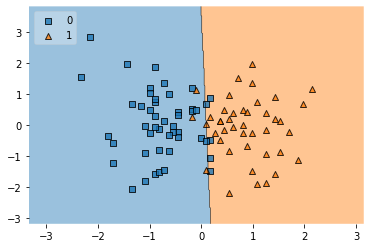

In [39]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [40]:
import pickle

In [41]:
pickle.dump(clf,open('model.pkl','wb'))